In [1]:
import skimage
print('skimage', skimage.__version__)

skimage 0.18.3


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
import sys

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
LIBRARY_DIR = os.path.join(CURRENT_DIR, '..', '..')

def saveas(name):
    image_name = '{}.png'.format(name)
    image_path = os.path.join(LIBRARY_DIR, 'site', '2018', '03', '26', 'images', image_name)
    plt.savefig(image_path, facecolor='#f8fafb', bbox_inches='tight')

## Image processing pipeline

/home/ridhwan/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


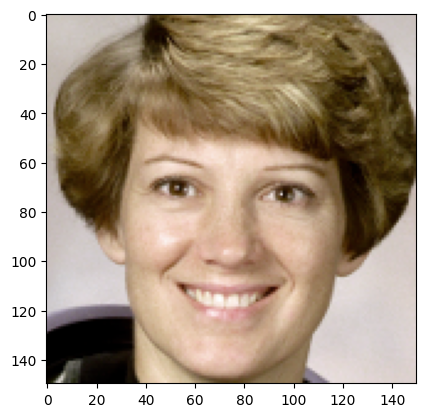

In [4]:
from skimage import data, img_as_float

astro = img_as_float()
astro = astro[30:180, 150:300]
plt.imshow(astro);

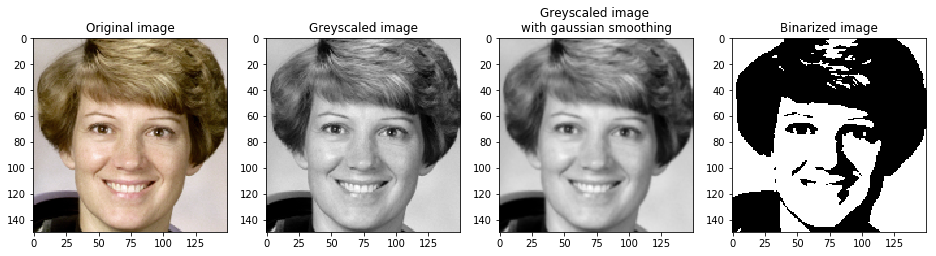

In [5]:
from skimage.filters import threshold_otsu, threshold_local, gaussian
from skimage import color

plt.figure(figsize=(16, 6))

plt.subplot(141)
plt.title("Original image")
plt.imshow(astro)

astro_grey = color.rgb2grey(astro)

plt.subplot(142)
plt.title("Greyscaled image")
plt.imshow(astro_grey, cmap='gray')

# We added gaussian smoothing in order to reduce
# number of very small regions
astro_grey = gaussian(astro_grey, sigma=0.6)

plt.subplot(143)
plt.title("Greyscaled image \nwith gaussian smoothing")
plt.imshow(astro_grey, cmap='gray')

# Increase threshold in order to add more
# details to the binarized image
threshold_adjustment = 0.1
thresh = threshold_otsu(astro_grey) + threshold_adjustment
binary_astro = astro_grey < thresh

plt.subplot(144)
plt.title("Binarized image")
plt.imshow(astro_grey > thresh, cmap='gray');

## Convert image to the set of data points

Number of data points: 11,931


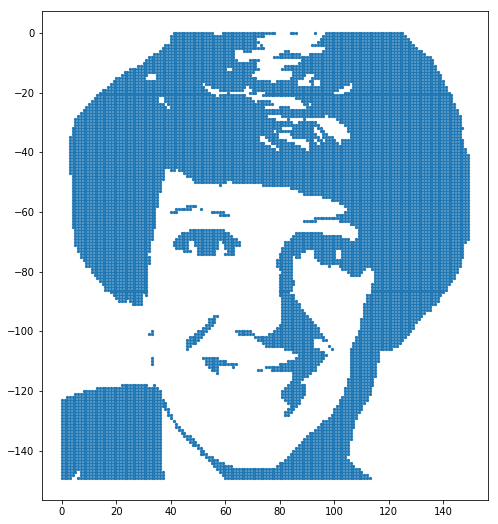

In [6]:
import numpy as np

def image_to_data(img):
    data = []
    for (x, y), value in np.ndenumerate(img):
        if value == 1:
            data.append([y, -x])
    return data

# Convert each black pixel to a separate data point
# We will use these data points in order to learn
# topological structure of the image
data = image_to_data(binary_astro)

# Scaling factor allows us to reduce distance between data points
scale_factor = 0.001   
data = scale_factor * np.array(data)
print("Number of data points: {:,}".format(len(data)))

plt.figure(figsize=(8, 9))
plt.scatter(*np.array(data).T / scale_factor, s=5, alpha=1);

(-80, -60)

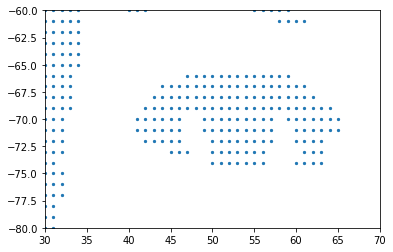

In [7]:
plt.scatter(*np.array(data).T / scale_factor, s=5, alpha=1);
plt.xlim(30, 70)
plt.ylim(-80, -60)

## Draw astronaut image

In [8]:
def draw_image(graph, show=True):
    for node_1, node_2 in graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')
        plt.setp(line, linewidth=0.2, color='black')

    plt.xticks([], [])
    plt.yticks([], [])
    
    if show:
        plt.show()

In [9]:
def create_gng(max_nodes, step=0.2, n_start_nodes=2, max_edge_age=50):
    return algorithms.GrowingNeuralGas(
        n_inputs=2,
        n_start_nodes=n_start_nodes,

        shuffle_data=True,
        verbose=True,

        step=step,
        neighbour_step=0.005,

        max_edge_age=max_edge_age,
        max_nodes=max_nodes,

        n_iter_before_neuron_added=100,
        after_split_error_decay_rate=0.5,
        error_decay_rate=0.995,
        min_distance_for_update=0.01,
    )


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] verbose = True
[OPTION] signals = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 2400
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 100
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.005
[OPTION] step = 0.2


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #1, train err: 0.008212, time: 1 sec



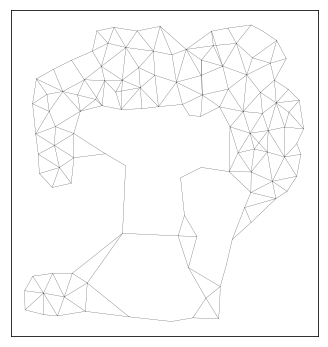


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #2, train err: 0.003526, time: 2 sec



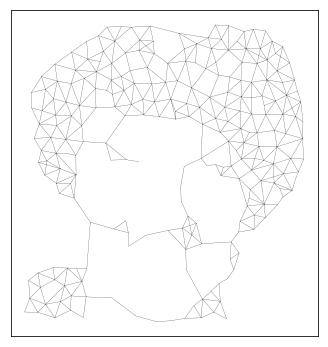


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #3, train err: 0.002724, time: 3 sec



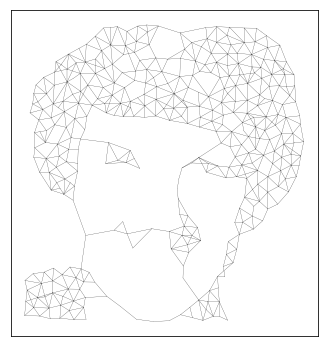


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #4, train err: 0.002291, time: 3 sec



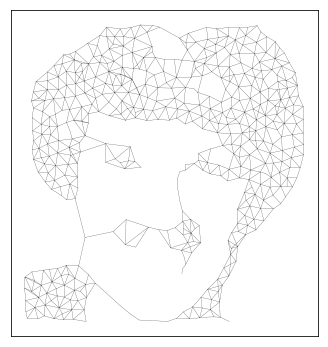


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #5, train err: 0.002027, time: 4 sec



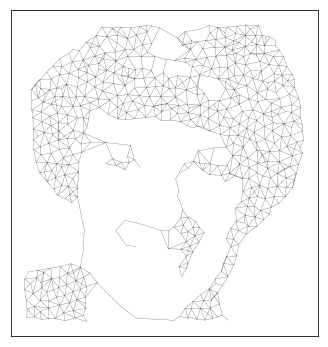


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #6, train err: 0.001829, time: 5 sec



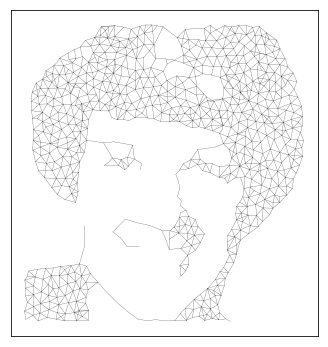


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #7, train err: 0.001686, time: 6 sec



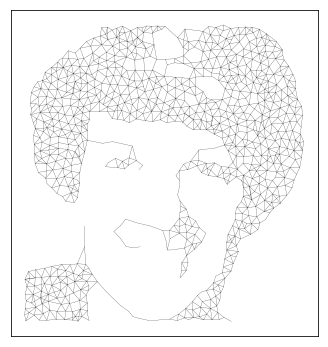


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #8, train err: 0.001571, time: 7 sec



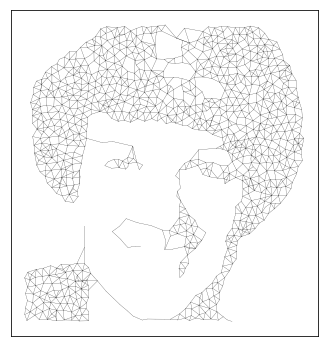


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #9, train err: 0.001474, time: 9 sec



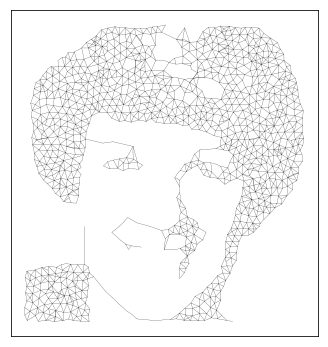


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #10, train err: 0.001393, time: 10 sec



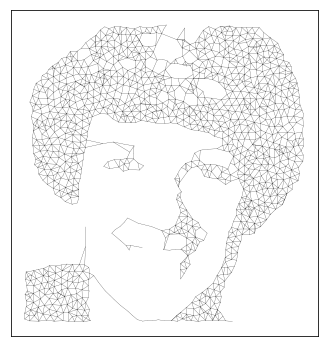


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #11, train err: 0.001323, time: 10 sec



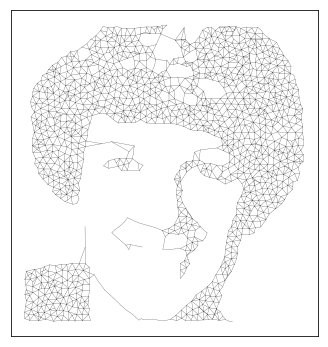


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #12, train err: 0.001265, time: 11 sec



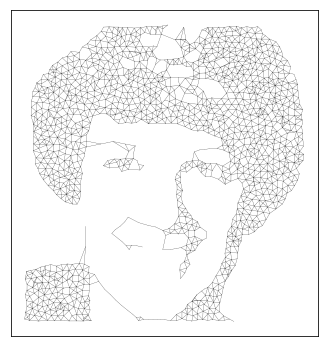


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #13, train err: 0.001209, time: 12 sec



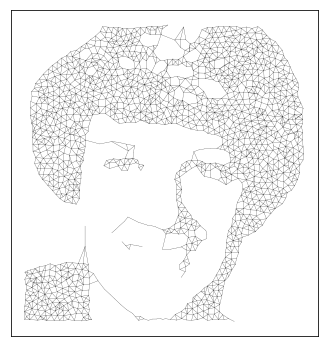


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #14, train err: 0.001160, time: 13 sec



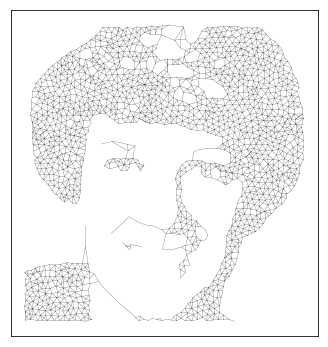


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #15, train err: 0.001119, time: 14 sec



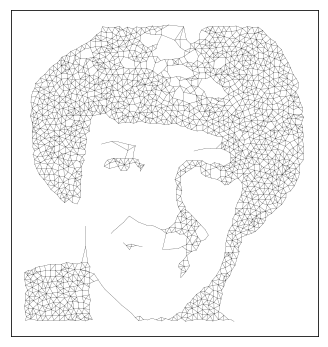


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #16, train err: 0.001082, time: 15 sec



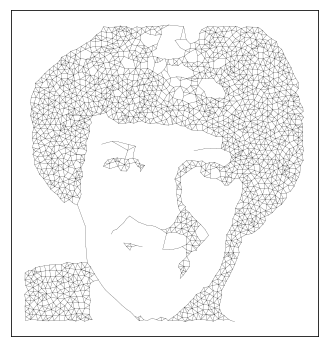


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #17, train err: 0.001048, time: 16 sec



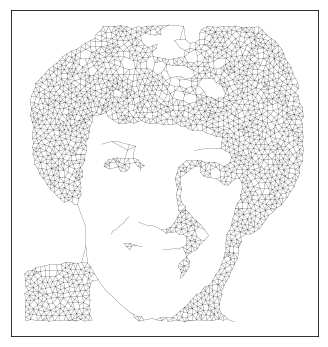


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #18, train err: 0.001016, time: 17 sec



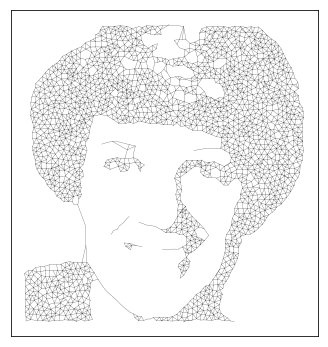


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #19, train err: 0.000988, time: 18 sec



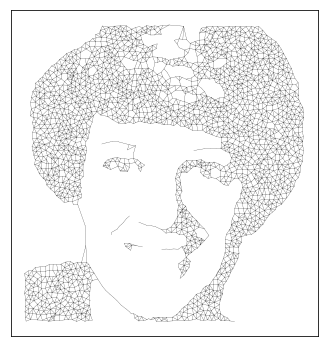


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #20, train err: 0.000962, time: 19 sec



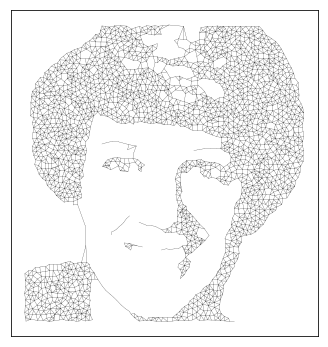

In [10]:
from neupy import algorithms, utils
    
utils.reproducible()
gng = create_gng(max_nodes=2400)

for epoch in range(20):
    gng.train(data, epochs=1)
    
    # Plot images after each iteration in order to see training progress
    plt.figure(figsize=(5.5, 6))
    draw_image(gng.graph)

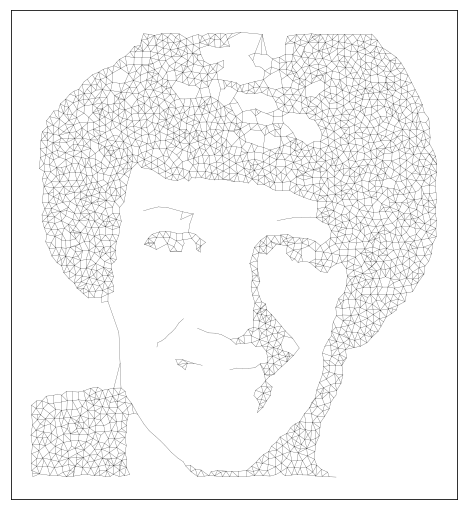

In [11]:
plt.figure(figsize=(8, 9))
draw_image(gng.graph)

## Draw man with camera image

In [12]:
def binarize_image(img, sigma=1.0, threshold_adjustment=0):
    img_grey = color.rgb2grey(img)
    img_grey_blured = gaussian(img_grey, sigma=sigma)
    thresh = threshold_otsu(img_grey_blured) + threshold_adjustment
    return img_grey_blured < thresh

/Users/itdxer/.pyenv/versions/3.6.0/envs/neupy36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


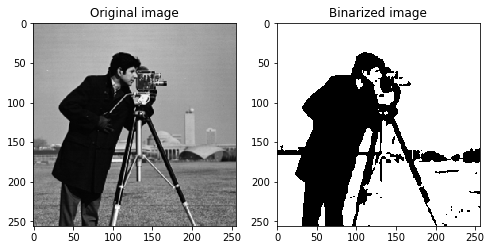

In [13]:
from skimage import data
from skimage.transform import resize

camera = img_as_float(data.camera())
camera = resize(camera, (256, 256))

plt.figure(figsize=(8, 6))
binary_camera = binarize_image(camera, sigma=1.0, threshold_adjustment=0.05)

plt.subplot(121)
plt.title("Original image")
plt.imshow(camera, cmap='gray')

plt.subplot(122)
plt.title("Binarized image")
plt.imshow(binary_camera, cmap='binary');


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] verbose = True
[OPTION] signals = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 2600
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 100
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.005
[OPTION] step = 0.2


Start training

[TRAINING DATA] shapes: (18230, 2)
[TRAINING] Total epochs: 16

epoch #1, train err: 8.470599, time: 2 sec
epoch #2, train err: 3.571481, time: 4 sec
epoch #3, train err: 2.743446, time: 6 sec
epoch #4, train err: 2.308077, time: 9 sec
epoch #5, train err: 2.036377, time: 11 sec
epoch #6, train err: 1.839221, time: 13 sec
epoch #7, train err: 1.685065, time: 15 sec
epoch #8, train err: 1.567771, time: 18 sec
epoch #9, train err: 1.467250, time: 21 sec
epoch #10, train err: 1.389600, time: 21 sec
epoch #11, train 

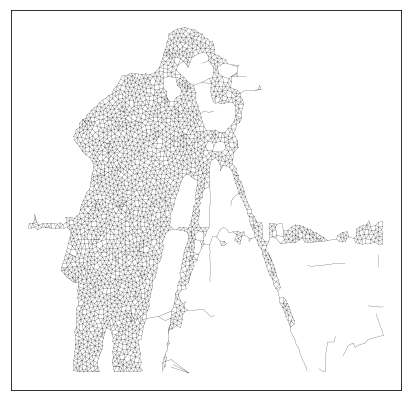

In [14]:
utils.reproducible()
gng = create_gng(max_nodes=2600)

data = image_to_data(binary_camera)
gng.train(data, epochs=16)

plt.figure(figsize=(7, 7))
draw_image(gng.graph)

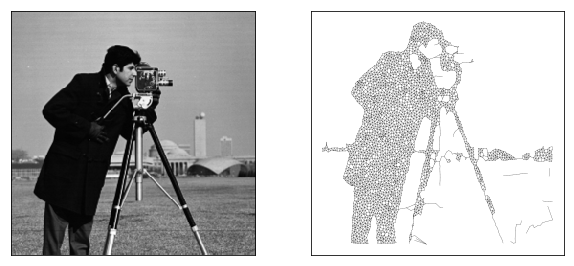

In [15]:
plt.figure(figsize=(10, 4.5))

plt.subplot(121)
plt.imshow(camera, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
draw_image(gng.graph, show=False)

saveas('camera-man')

## Draw horse image

/Users/itdxer/.pyenv/versions/3.6.0/envs/neupy36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


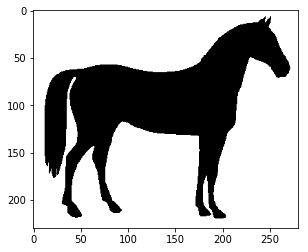

In [16]:
from skimage import data

binary_horse = np.bitwise_not(data.horse())
binary_horse = resize(binary_horse, (230, 280))

plt.imshow(binary_horse, cmap='binary');


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] verbose = True
[OPTION] signals = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 2000
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 100
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.005
[OPTION] step = 0.2


Start training

[TRAINING DATA] shapes: (20630, 2)
[TRAINING] Total epochs: 10

epoch #1, train err: 8.007830, time: 2 sec
epoch #2, train err: 3.423387, time: 6 sec
epoch #3, train err: 2.638513, time: 9 sec
epoch #4, train err: 2.242174, time: 11 sec
epoch #5, train err: 1.981113, time: 14 sec
epoch #6, train err: 1.797025, time: 17 sec
epoch #7, train err: 1.661651, time: 20 sec
epoch #8, train err: 1.550159, time: 22 sec
epoch #9, train err: 1.455816, time: 26 sec
epoch #10, train err: 1.378893, time: 29 sec



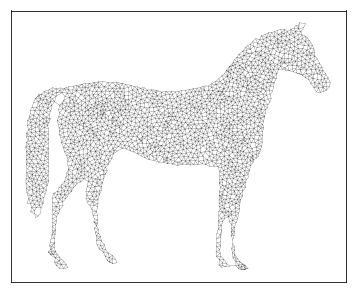

In [17]:
utils.reproducible()
gng = create_gng(max_nodes=2000)

data = image_to_data(binary_horse)
gng.train(data, epochs=10)

plt.figure(figsize=(6, 5))
draw_image(gng.graph)

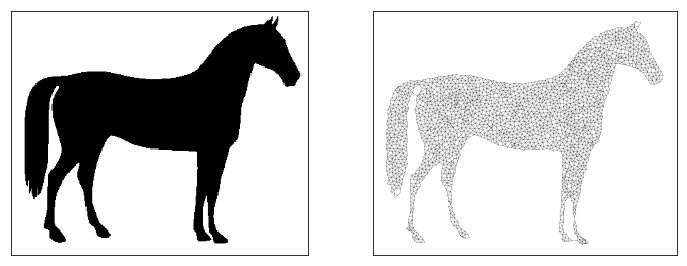

In [18]:
plt.figure(figsize=(12, 4.5))

plt.subplot(121)
plt.imshow(binary_horse, cmap='binary')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
draw_image(gng.graph, show=False)

saveas('horses')

## Draw text from the image

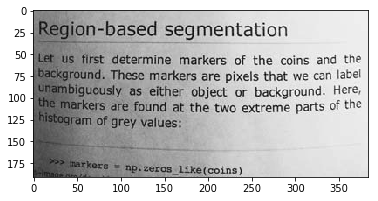

In [19]:
from skimage import data
page = data.page()
plt.imshow(page, cmap='gray');

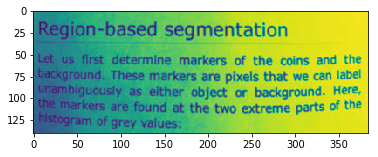

/Users/itdxer/.pyenv/versions/3.6.0/envs/neupy36/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


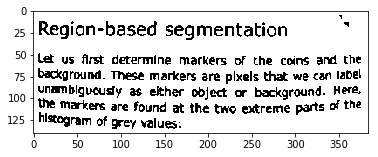

In [20]:
from skimage import filters
from skimage.morphology import disk
from skimage.filters import rank

# Remove lower part of the image
img_grey_blured = page[:140, :]
img_grey_blured = gaussian(img_grey_blured, sigma=0.6)
plt.imshow(img_grey_blured)
plt.show()

radius = 31
selem = disk(radius)
thresh = rank.otsu(img_grey_blured, selem)
binary_page = 255 * img_grey_blured < thresh

plt.imshow(binary_page, cmap='binary');


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] verbose = True
[OPTION] signals = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 20
[OPTION] max_nodes = 3200
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 50
[OPTION] n_start_nodes = 1600
[OPTION] neighbour_step = 0.005
[OPTION] step = 0.4


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #1, train err: 1.297921, time: 10 sec



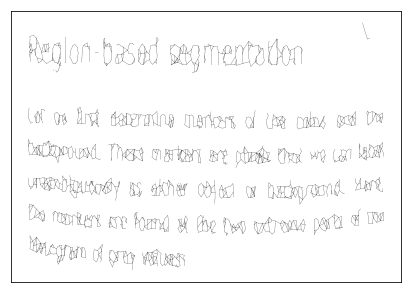


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #2, train err: 1.079530, time: 11 sec



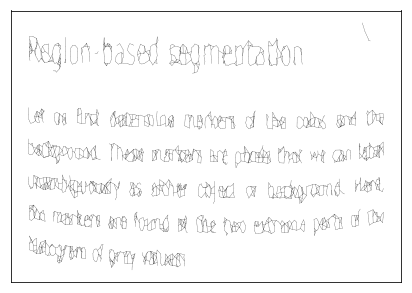


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #3, train err: 1.001636, time: 12 sec



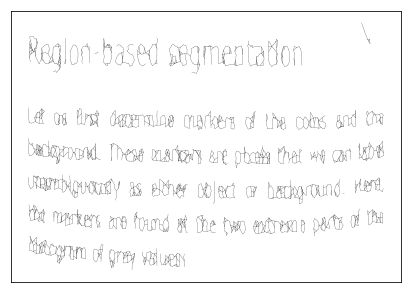


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #4, train err: 0.947263, time: 13 sec



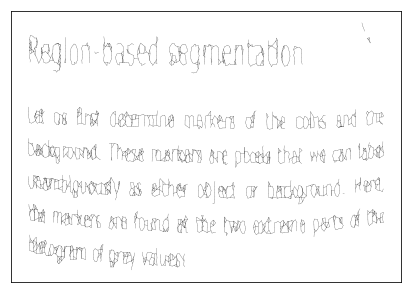


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #5, train err: 0.903968, time: 14 sec



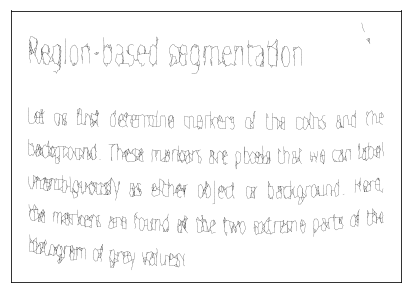


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #6, train err: 0.867588, time: 15 sec



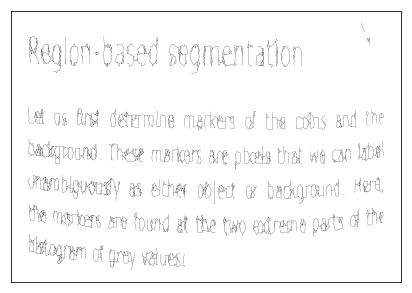


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #7, train err: 0.834798, time: 17 sec



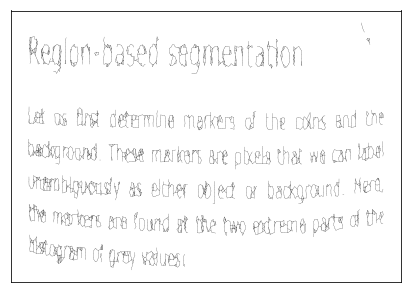


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #8, train err: 0.804908, time: 17 sec



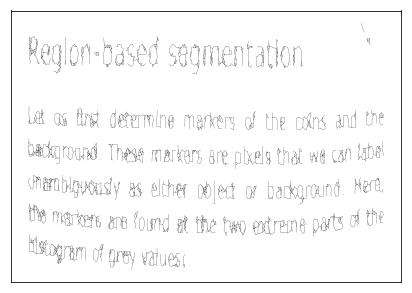


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #9, train err: 0.779234, time: 17 sec



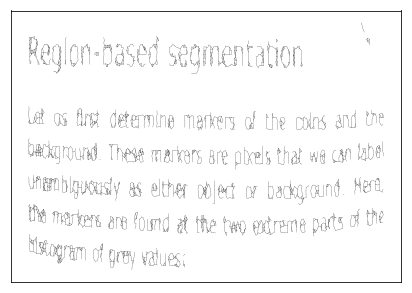


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #10, train err: 0.763996, time: 19 sec



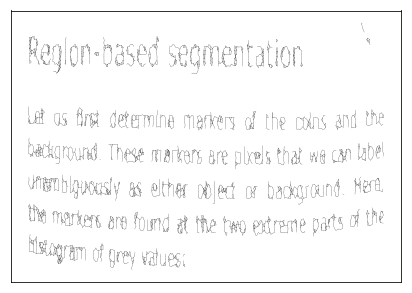


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #11, train err: 0.756515, time: 19 sec



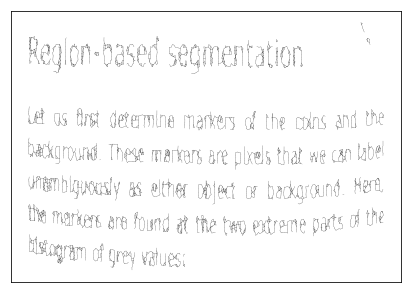


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #12, train err: 0.754822, time: 18 sec



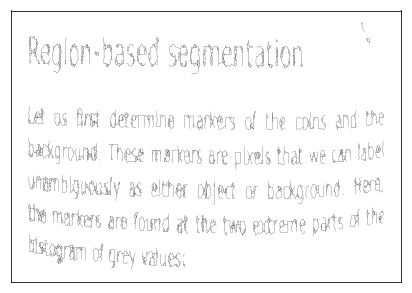


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #13, train err: 0.752369, time: 17 sec



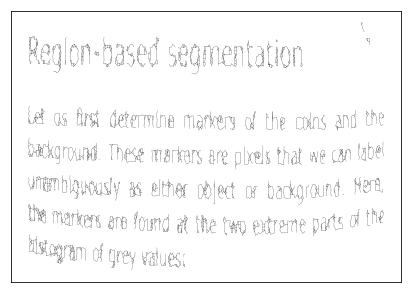


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #14, train err: 0.752259, time: 18 sec



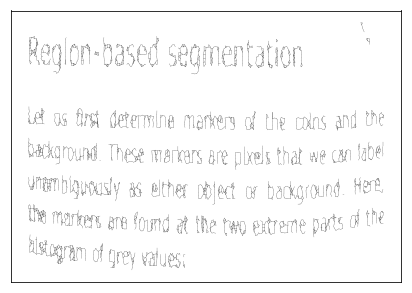


Start training

[TRAINING DATA] shapes: (9030, 2)
[TRAINING] Total epochs: 1

epoch #15, train err: 0.750352, time: 17 sec



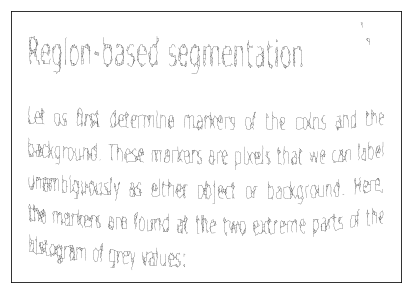

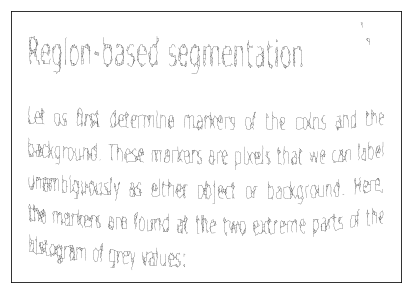

In [21]:
from neupy import utils, algorithms

utils.reproducible()
gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=1600,

    shuffle_data=True,
    verbose=True,

    step=0.4,
    neighbour_step=0.005,

    max_edge_age=20,
    max_nodes=3200,

    n_iter_before_neuron_added=50,
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.01,
)

data = image_to_data(binary_page)

for _ in range(15):
    gng.train(data, epochs=1)
    plt.figure(figsize=(7, 5))
    draw_image(gng.graph)

plt.figure(figsize=(7, 5))
draw_image(gng.graph)

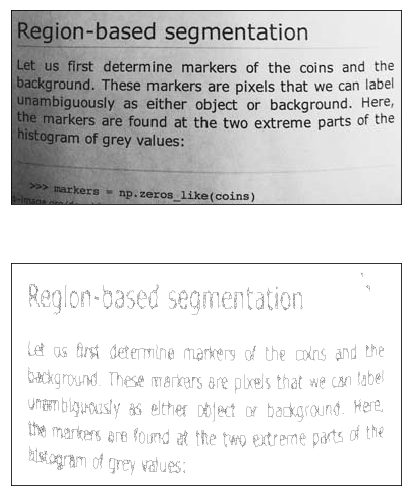

In [22]:
plt.figure(figsize=(7, 9))

plt.subplot(211)
plt.imshow(page, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(212)
draw_image(gng.graph, show=False)

saveas('text-in-page')

## Count number of words in the page

/Users/itdxer/.pyenv/versions/3.6.0/envs/neupy36/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


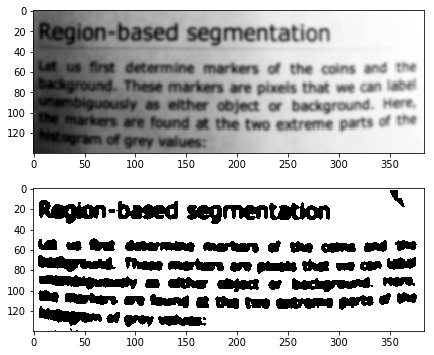

In [31]:
from skimage import filters

plt.figure(figsize=(7, 6))

# Remove lower part of the image
img_grey_blured = page[:140, :]

# Add lots of bluring in order to get rid of spaces between words
img_grey_blured = gaussian(img_grey_blured, sigma=1.5)

plt.subplot(211)
plt.imshow(img_grey_blured, cmap='gray')

radius = 31
selem = disk(radius)
thresh = rank.otsu(img_grey_blured, selem)
binary_page = 255 * img_grey_blured < thresh

plt.subplot(212)
plt.imshow(binary_page, cmap='binary');

saveas('blured-text-binarized')

In [24]:
import copy

def extract_subgraphs(graph):
    subgraphs = []
    edges_per_node = copy.deepcopy(graph.edges_per_node)
    
    while edges_per_node:
        nodes_left = list(edges_per_node.keys())
        nodes_to_check = [nodes_left[0]]
        subgraph = []
        
        while nodes_to_check:
            node = nodes_to_check.pop()
            subgraph.append(node)

            if node in edges_per_node:
                nodes_to_check.extend(edges_per_node[node])
                del edges_per_node[node]
            
        subgraphs.append(subgraph)
        
    return subgraphs


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] verbose = True
[OPTION] signals = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 3200
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 100
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.005
[OPTION] step = 0.2


Start training

[TRAINING DATA] shapes: (15225, 2)
[TRAINING] Total epochs: 8

epoch #1, train err: 10.566878, time: 1 sec
epoch #2, train err: 3.719218, time: 2 sec
epoch #3, train err: 2.820348, time: 4 sec
epoch #4, train err: 2.345771, time: 6 sec
epoch #5, train err: 2.047515, time: 7 sec
epoch #6, train err: 1.840968, time: 9 sec
epoch #7, train err: 1.695836, time: 11 sec
epoch #8, train err: 1.578779, time: 12 sec



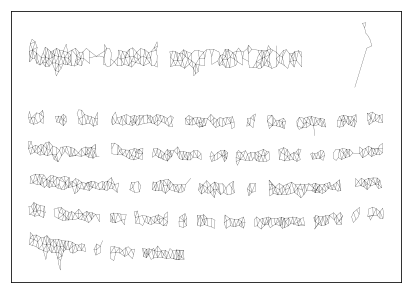

Found 43 words in the page


In [25]:
utils.reproducible()
gng = create_gng(3200, step=0.2, n_start_nodes=2, max_edge_age=50)

data = image_to_data(binary_page)
gng.train(data, epochs=8)

plt.figure(figsize=(7, 5))
draw_image(gng.graph)
print("Found {} words in the page".format(len(extract_subgraphs(gng.graph))))

## Drawing signure from the image

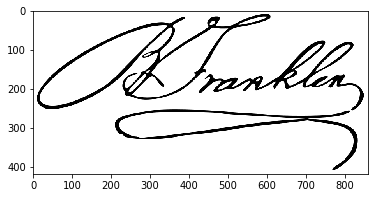

In [26]:
import os
from skimage import data

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
signature_filepath = os.path.join(CURRENT_DIR, '..', 'images', 'signature.png')
signature = img_as_float(data.load(signature_filepath))
signature = signature[:, :, 3]
plt.imshow(signature, cmap='binary')


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] verbose = True
[OPTION] signals = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 600
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 100
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.005
[OPTION] step = 0.2


Start training

[TRAINING DATA] shapes: (28629, 2)
[TRAINING] Total epochs: 5

epoch #1, train err: 14.490941, time: 4 sec
epoch #2, train err: 3.951416, time: 9 sec
epoch #3, train err: 3.032894, time: 12 sec
epoch #4, train err: 2.989505, time: 13 sec
epoch #5, train err: 2.986548, time: 13 sec



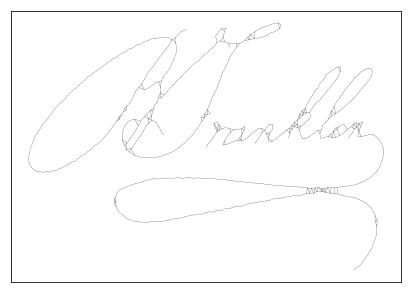

In [27]:
utils.reproducible()
gng = create_gng(max_nodes=600)

data = image_to_data(signature)
gng.train(data, epochs=5)

plt.figure(figsize=(7, 5))
draw_image(gng.graph)

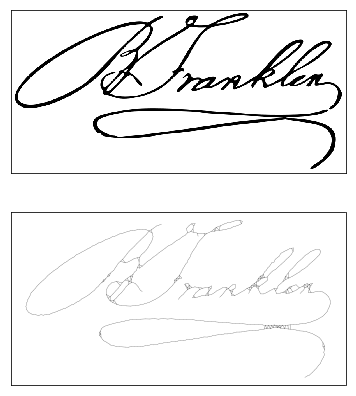

In [28]:
plt.figure(figsize=(6, 7))

plt.subplot(211)
plt.imshow(signature, cmap='binary')
plt.xticks([])
plt.yticks([])

plt.subplot(212)
draw_image(gng.graph, show=False)

saveas('signature')